In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
X, y = make_classification(
    n_samples=1000,      
    n_features=10,      
    n_informative=5,    
    n_redundant=2,       
    n_classes=2,       
    random_state=42
)

In [3]:
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["target"] = y

In [4]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

Точність моделі: 0.855

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.89      0.81      0.85       101

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200



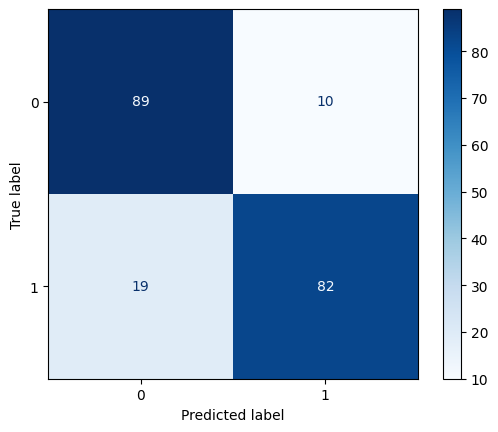

In [8]:
acc = accuracy_score(y_test, y_pred)
print("Точність моделі:", acc)

print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

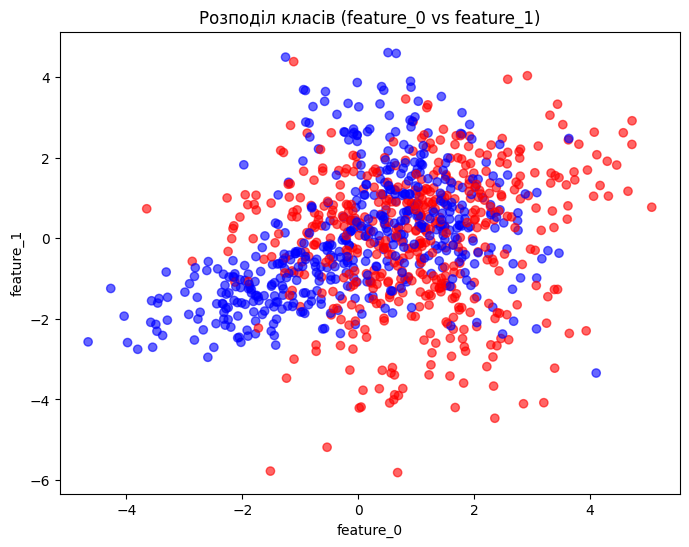

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", alpha=0.6)
plt.title("Розподіл класів (feature_0 vs feature_1)")
plt.xlabel("feature_0")
plt.ylabel("feature_1")
plt.show()